Empty DataFrame
Columns: [Festival_Name, Location, Attendance_Numbers, Visitor_Demographics, Economic_Impact, Music_Genre]
Index: []


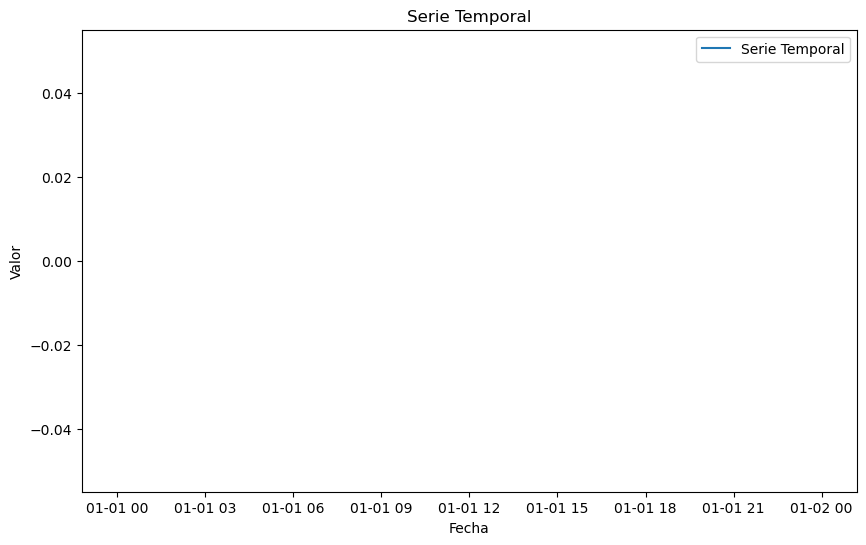

Tamaño del conjunto de entrenamiento: 0
Número de lags: 1


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: maxlag should be < nobs

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Cargar los datos
file_path = 'data.csv'  # Cambia esta ruta por la ruta a tu archivo
data = pd.read_csv(file_path)

# Crear una columna de fechas simuladas
data['fecha'] = pd.date_range(start='2020-01-01', periods=len(data), freq='D')

# Establecer la columna de fecha como índice
data.set_index('fecha', inplace=True)

# Asegurarse de que la columna de valores es numérica
data['Visitor_Demographics'] = pd.to_numeric(data['Visitor_Demographics'], errors='coerce')
data.dropna(subset=['Visitor_Demographics'], inplace=True)

print(data.head())

# Visualizar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(data['Visitor_Demographics'], label='Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal')
plt.legend()
plt.show()

# Dividir los datos en entrenamiento y prueba
train_size = int(0.8 * len(data))
train_data = data['Visitor_Demographics'][:train_size]  # 80% de los datos para entrenamiento
test_data = data['Visitor_Demographics'][train_size:]  # 20% de los datos para prueba

# Verificar el tamaño del conjunto de entrenamiento
print(f'Tamaño del conjunto de entrenamiento: {len(train_data)}')

# Asegurarse de que max_lags sea un número entero positivo
max_lags = max(1, min(5, len(train_data) - 1))  # Asegúrate de que max_lags sea al menos 1
print(f'Número de lags: {max_lags}')

# Crear y ajustar el modelo
model = AutoReg(train_data, lags=max_lags)
model_fitted = model.fit()

# Imprimir el resumen del modelo
print(model_fitted.summary())

# Hacer predicciones
start_index = len(train_data)
end_index = len(data) - 1
predictions = model_fitted.predict(start=start_index, end=end_index, dynamic=False)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Entrenamiento')
plt.plot(test_data.index, test_data, label='Prueba')
plt.plot(test_data.index, predictions, label='Predicciones', color='red')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Predicciones del Modelo AR')
plt.legend()
plt.show()

# Evaluar el modelo (por ejemplo, usando el error cuadrático medio)
mse = mean_squared_error(test_data, predictions)
print(f'Error cuadrático medio: {mse}')


MA

In [4]:
pip install pandas statsmodels matplotlib pmdarima


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



Tamaño de los datos: 100


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                SARIMAX Results                                 
Dep. Variable:     Visitor_Demographics   No. Observations:                   80
Model:                   ARIMA(0, 0, 1)   Log Likelihood                -195.090
Date:                  Fri, 26 Jul 2024   AIC                            396.180
Time:                          16:04:12   BIC                            403.327
Sample:                      01-01-2020   HQIC                           399.046
                           - 03-20-2020                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5798      0.597     11.013      0.000       5.409       7.751
ma.L1          0.8643      0.067     12.855      0.000       0.733       0.996
sigma2         7.5549      1.796    

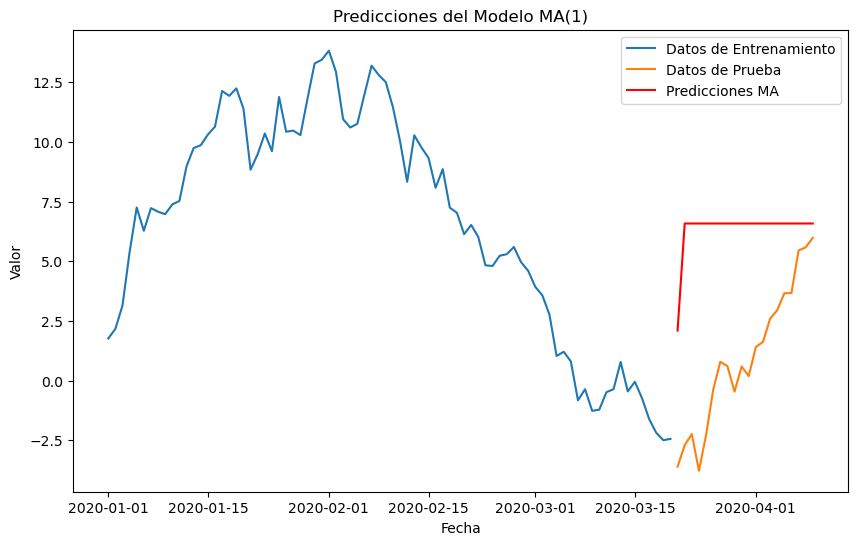

Error cuadrático medio MA: 36.35341911341574


In [23]:
import numpy as np  # Asegúrate de importar numpy
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Crear datos simulados
np.random.seed(0)  # Para reproducibilidad
n = 100
dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
data = pd.DataFrame({
    'fecha': dates,
    'Visitor_Demographics': np.random.randn(n).cumsum()  # Serie temporal simulada
})

# Establecer la columna de fecha como índice
data.set_index('fecha', inplace=True)

# Asegurarse de que la columna de valores es numérica
data['Visitor_Demographics'] = pd.to_numeric(data['Visitor_Demographics'], errors='coerce')

# Verificar el tamaño de los datos
print(f'Tamaño de los datos: {len(data)}')
if len(data) < 20:
    raise ValueError("No hay suficientes datos para realizar la predicción. Se requieren al menos 20 observaciones.")

# Dividir los datos en entrenamiento y prueba
train_size = int(0.8 * len(data))
train_data = data['Visitor_Demographics'][:train_size]  # 80% de los datos para entrenamiento
test_data = data['Visitor_Demographics'][train_size:]  # 20% de los datos para prueba

# Ajustar el modelo ARIMA
model_ma = ARIMA(train_data, order=(0, 0, 1))  # Modelo MA(1)
model_ma_fitted = model_ma.fit()

# Imprimir el resumen del modelo
print(model_ma_fitted.summary())

# Hacer predicciones
start_index = len(train_data)
end_index = len(data) - 1
predictions_ma = model_ma_fitted.predict(start=start_index, end=end_index, dynamic=False)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(data.index[:train_size], train_data, label='Datos de Entrenamiento')
plt.plot(data.index[train_size:], test_data, label='Datos de Prueba')
plt.plot(data.index[train_size:], predictions_ma, label='Predicciones MA', color='red')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Predicciones del Modelo MA(1)')
plt.legend()
plt.show()

# Evaluar el modelo
mse_ma = mean_squared_error(test_data, predictions_ma)
print(f'Error cuadrático medio MA: {mse_ma}')


ARMA

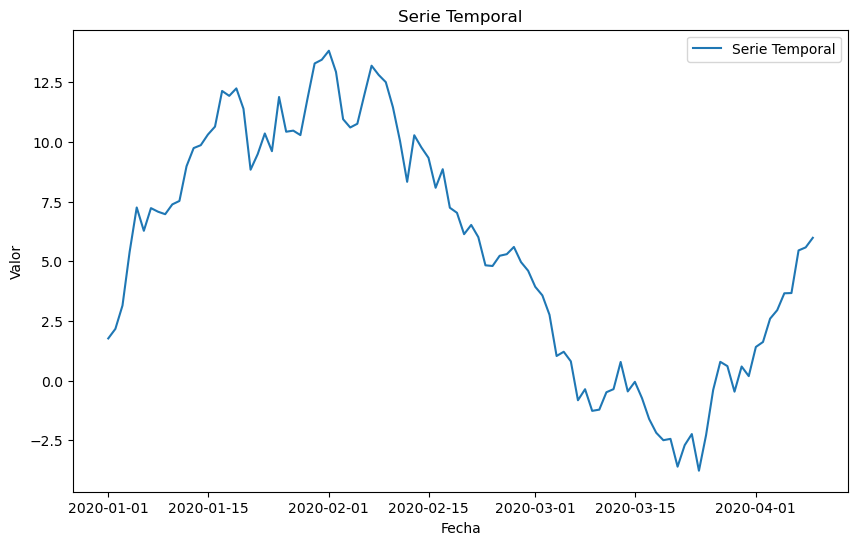

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     Visitor_Demographics   No. Observations:                   80
Model:                   ARIMA(1, 0, 1)   Log Likelihood                -113.953
Date:                  Fri, 26 Jul 2024   AIC                            235.906
Time:                          16:06:06   BIC                            245.434
Sample:                      01-01-2020   HQIC                           239.726
                           - 03-20-2020                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7544      9.357      0.294      0.768     -15.585      21.094
ar.L1          0.9805      0.026     37.056      0.000       0.929       1.032
ma.L1          0.0664      0.104    

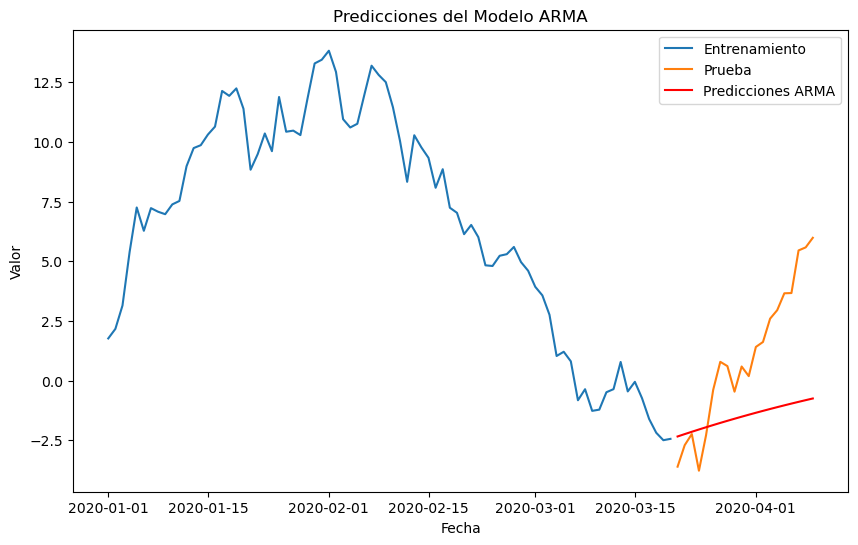

Error cuadrático medio ARMA: 12.200328419490713


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Crear datos simulados
np.random.seed(0)  # Para reproducibilidad
n = 100
dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
data = pd.DataFrame({
    'fecha': dates,
    'Visitor_Demographics': np.random.randn(n).cumsum()  # Serie temporal simulada
})

# Establecer la columna de fecha como índice
data.set_index('fecha', inplace=True)

# Asegurarse de que la columna de valores es numérica
data['Visitor_Demographics'] = pd.to_numeric(data['Visitor_Demographics'], errors='coerce')
data.dropna(subset=['Visitor_Demographics'], inplace=True)

# Visualizar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(data['Visitor_Demographics'], label='Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal')
plt.legend()
plt.show()

# Dividir los datos en entrenamiento y prueba
train_size = int(0.8 * len(data))
train_data = data['Visitor_Demographics'][:train_size]  # 80% de los datos para entrenamiento
test_data = data['Visitor_Demographics'][train_size:]  # 20% de los datos para prueba

# Crear y ajustar el modelo ARMA
p, q = 1, 1  # Ejemplo con p=1 y q=1, ajusta según el análisis
model_arma = ARIMA(train_data, order=(p, 0, q))  # ARMA(p, q) = ARIMA(p, 0, q)
model_arma_fitted = model_arma.fit()

# Imprimir el resumen del modelo
print(model_arma_fitted.summary())

# Hacer predicciones
start_index = len(train_data)
end_index = len(data) - 1
predictions_arma = model_arma_fitted.predict(start=start_index, end=end_index, dynamic=False)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Entrenamiento')
plt.plot(test_data.index, test_data, label='Prueba')
plt.plot(test_data.index, predictions_arma, label='Predicciones ARMA', color='red')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Predicciones del Modelo ARMA')
plt.legend()
plt.show()

# Evaluar el modelo
mse_arma = mean_squared_error(test_data, predictions_arma)
print(f'Error cuadrático medio ARMA: {mse_arma}')


ARIMA

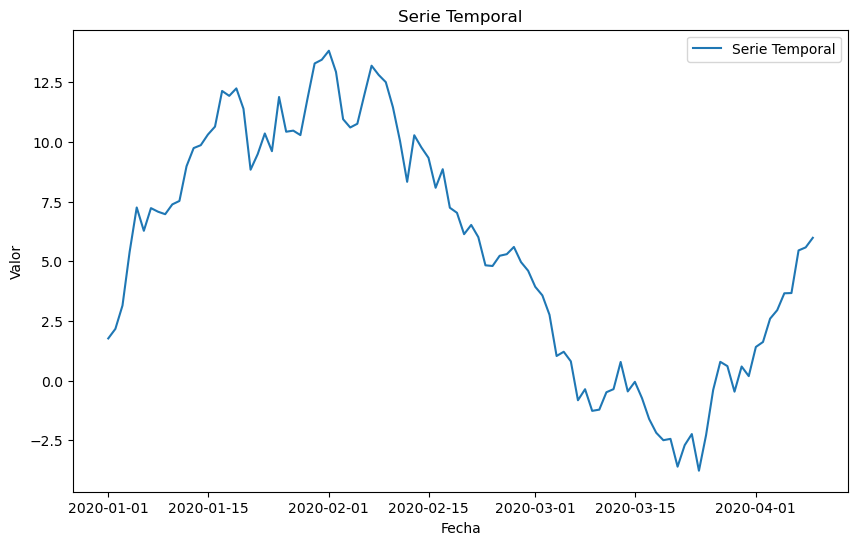

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     Visitor_Demographics   No. Observations:                   80
Model:                   ARIMA(1, 1, 1)   Log Likelihood                -111.106
Date:                  Fri, 26 Jul 2024   AIC                            228.213
Time:                          16:07:46   BIC                            235.321
Sample:                      01-01-2020   HQIC                           231.061
                           - 03-20-2020                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5518      0.856      0.645      0.519      -1.126       2.229
ma.L1         -0.4612      0.901     -0.512      0.609      -2.226       1.304
sigma2         0.9751      0.168    

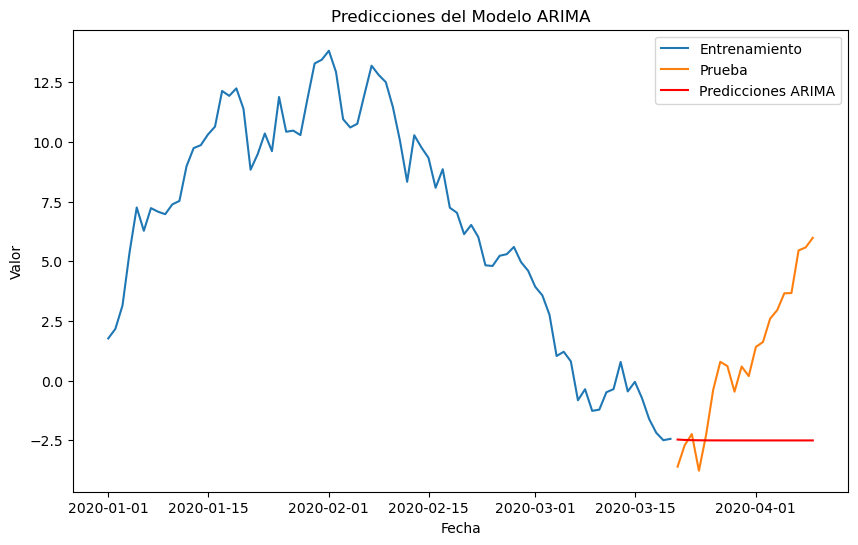

Error cuadrático medio ARIMA: 20.713554833630162


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Crear datos simulados
np.random.seed(0)  # Para reproducibilidad
n = 100
dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
data = pd.DataFrame({
    'fecha': dates,
    'Visitor_Demographics': np.random.randn(n).cumsum()  # Serie temporal simulada
})

# Establecer la columna de fecha como índice
data.set_index('fecha', inplace=True)

# Asegurarse de que la columna de valores es numérica
data['Visitor_Demographics'] = pd.to_numeric(data['Visitor_Demographics'], errors='coerce')
data.dropna(subset=['Visitor_Demographics'], inplace=True)

# Visualizar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(data['Visitor_Demographics'], label='Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal')
plt.legend()
plt.show()

# Dividir los datos en entrenamiento y prueba
train_size = int(0.8 * len(data))
train_data = data['Visitor_Demographics'][:train_size]  # 80% de los datos para entrenamiento
test_data = data['Visitor_Demographics'][train_size:]  # 20% de los datos para prueba

# Crear y ajustar el modelo ARIMA
p, d, q = 1, 1, 1  # Ejemplo con p=1, d=1, q=1
model_arima = ARIMA(train_data, order=(p, d, q))  # ARIMA(p, d, q)
model_arima_fitted = model_arima.fit()

# Imprimir el resumen del modelo
print(model_arima_fitted.summary())

# Hacer predicciones
start_index = len(train_data)
end_index = len(data) - 1
predictions_arima = model_arima_fitted.predict(start=start_index, end=end_index, dynamic=False)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Entrenamiento')
plt.plot(test_data.index, test_data, label='Prueba')
plt.plot(test_data.index, predictions_arima, label='Predicciones ARIMA', color='red')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Predicciones del Modelo ARIMA')
plt.legend()
plt.show()

# Evaluar el modelo
mse_arima = mean_squared_error(test_data, predictions_arima)
print(f'Error cuadrático medio ARIMA: {mse_arima}')


AUTOARIMA

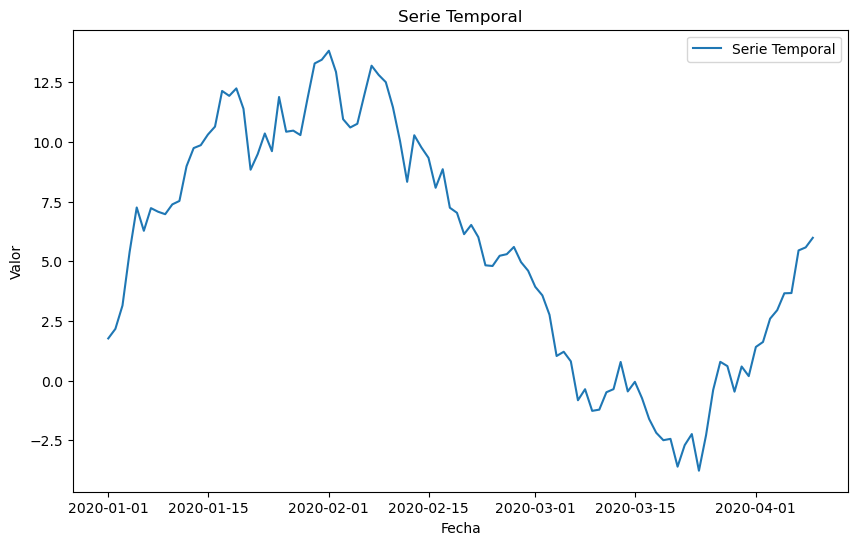

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=272.883, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=249.057, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=270.884, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=246.244, Time=0.11 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=247.150, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=244.281, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=247.067, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=245.216, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=228.656, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=226.931, Time=0.03 sec
 A

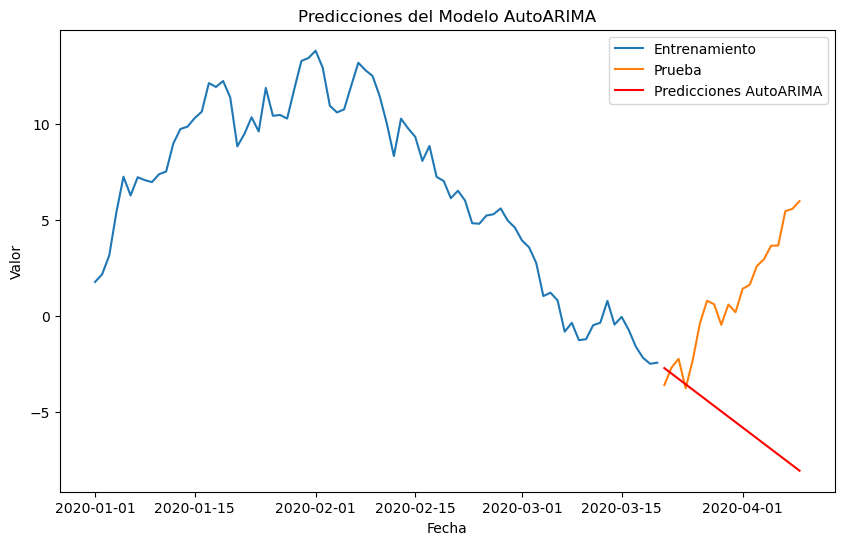

Error cuadrático medio AutoARIMA: 61.065447436683236


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Crear datos simulados
np.random.seed(0)  # Para reproducibilidad
n = 100
dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
data = pd.DataFrame({
    'fecha': dates,
    'Visitor_Demographics': np.random.randn(n).cumsum()  # Serie temporal simulada
})

# Establecer la columna de fecha como índice
data.set_index('fecha', inplace=True)

# Asegurarse de que la columna de valores es numérica
data['Visitor_Demographics'] = pd.to_numeric(data['Visitor_Demographics'], errors='coerce')
data.dropna(subset=['Visitor_Demographics'], inplace=True)

# Visualizar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(data['Visitor_Demographics'], label='Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal')
plt.legend()
plt.show()

# Dividir los datos en entrenamiento y prueba
train_size = int(0.8 * len(data))
train_data = data['Visitor_Demographics'][:train_size]  # 80% de los datos para entrenamiento
test_data = data['Visitor_Demographics'][train_size:]  # 20% de los datos para prueba

# Crear y ajustar el modelo AutoARIMA
model_auto_arima = auto_arima(train_data, seasonal=False, stepwise=True, trace=True)

# Imprimir el resumen del modelo
print(model_auto_arima.summary())

# Hacer predicciones
start_index = len(train_data)
end_index = len(data) - 1
predictions_auto_arima = model_auto_arima.predict(n_periods=len(test_data))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Entrenamiento')
plt.plot(test_data.index, test_data, label='Prueba')
plt.plot(test_data.index, predictions_auto_arima, label='Predicciones AutoARIMA', color='red')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Predicciones del Modelo AutoARIMA')
plt.legend()
plt.show()

# Evaluar el modelo
mse_auto_arima = mean_squared_error(test_data, predictions_auto_arima)
print(f'Error cuadrático medio AutoARIMA: {mse_auto_arima}')
